### *This notebook performs some high-level exploratory data analysis on the median lising price for each zip code. Additionally, we do analysis on COVID data by zip code: deaths, hospitalizations, testing outcomes. Finally, we compare the rates of the different COVID datasets by zip code, and by zip code in reference to each zip code's median listing price.

#### Analysis & Coding: Lawrence Love
#### COVID-19 Data via opendataphilly.org API: Lawrence Love
#### Housing Data via rapidapi.com: Frank Zhao & Jason Li
Last update: 11/20/20

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

In [2]:
# Updated Housing DF
re_df = pd.read_csv('./update_df.csv')

In [3]:
# Hospitalizations by zip
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_hospitalizations_by_zip'
response = requests.request("GET", url)
hosp_zip = pd.json_normalize(response.json()['rows'])

In [4]:
# Deaths by zip
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_deaths_by_zip'
response = requests.request("GET", url)
death_zip = pd.json_normalize(response.json()['rows'])

In [5]:
# Tests by zip
url = 'https://phl.carto.com/api/v2/sql?q=SELECT * FROM covid_cases_by_zip'
response = requests.request("GET", url)
test_zip = pd.json_normalize(response.json()['rows'])

In [6]:
re_df.head()

,property_id,prop_type,prop_sub_type,prop_status,price,baths_full,baths,beds,last_update,photo_count,...,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),lot_size(sqft),agent_id,agent_name,brand_name
0,M4046594895,condo,duplex_triplex,for_sale,249900,3.0,3,6.0,2020-10-13T17:54:05Z,9,...,PA,Philadelphia,39.974408,-75.243700,West Philadelphia,1632.0,1842.0,1291281.0,Ausra Anusauskas,Archstone Realty
1,M3939384476,condo,townhomes,for_sale,116800,1.0,1,3.0,2020-10-13T18:18:18Z,7,...,PA,Philadelphia,39.926283,-75.225382,Southwest Philadelphia,1092.0,992.0,347285.0,Dr Hanh Vo,Vihi Realty
2,M4036371277,condo,townhomes,for_sale,215000,1.0,2,3.0,2020-10-13T17:24:20Z,35,...,PA,Philadelphia,40.039721,-75.142100,Upper North District,1360.0,1501.0,NaN,Kevin Chen,Premium Realty Castor Inc
3,M3553029343,single_family,NaN,for_sale,394800,1.0,2,3.0,2020-10-13T17:11:54Z,123,...,PA,Philadelphia,40.071978,-75.073303,Near Northeast Philadelphia,1856.0,15913.0,4759.0,Carol Mallen,Re/Max Services
4,M3649199107,condo,townhomes,for_sale,130000,1.0,2,3.0,2020-10-13T17:02:13Z,33,...,PA,Philadelphia,40.012784,-75.156405,Upper North Philadelphia,1180.0,1240.0,391546.0,Maria Quattrone CEO,Re/Max @ Home - Philadelphia


In [7]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_id         9562 non-null   object 
 1   prop_type           9562 non-null   object 
 2   prop_sub_type       7050 non-null   object 
 3   prop_status         9562 non-null   object 
 4   price               9562 non-null   int64  
 5   baths_full          7802 non-null   float64
 6   baths               9562 non-null   int64  
 7   beds                8380 non-null   float64
 8   last_update         9562 non-null   object 
 9   photo_count         9562 non-null   int64  
 10  page_no             9562 non-null   int64  
 11  rank                9562 non-null   int64  
 12  baths_half          3394 non-null   float64
 13  city                9562 non-null   object 
 14  line                9553 non-null   object 
 15  postal_code         9562 non-null   int64  
 16  state_

In [8]:
# Make a zip code median_price DF
price_median_by_zip = re_df.groupby('postal_code')['price'].median().rename_axis('zip_code').reset_index(name='median_price').sort_values('median_price', ascending=False)
price_median_by_zip.reset_index(drop=True, inplace=True)

In [9]:
price_median_by_zip.head()

,zip_code,median_price
0,19118,860000.0
1,19102,670000.0
2,19103,599900.0
3,19106,575000.0
4,19147,525000.0


In [10]:
price_median_by_zip.tail()

,zip_code,median_price
41,19139,127450.0
42,19142,115000.0
43,19140,80000.0
44,19133,52500.0
45,19132,50000.0


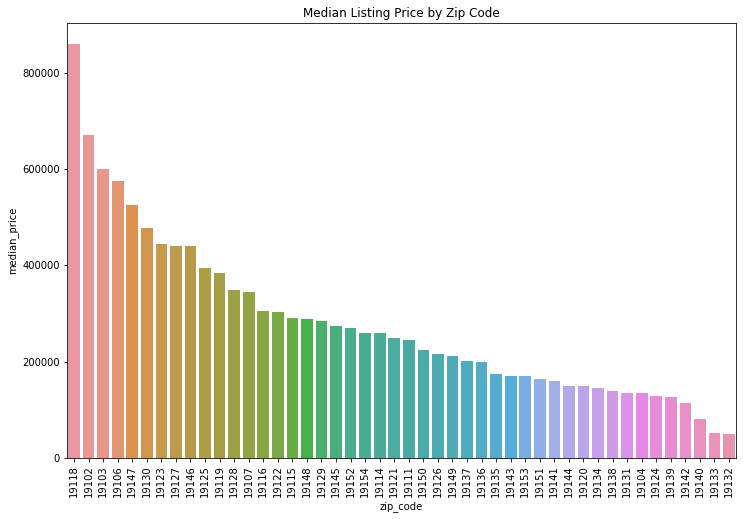

In [11]:
# Median listing price by zip code
plt.subplots(figsize=(12,8))
price_median_by_zip_plot = sns.barplot(x='zip_code', y='median_price', data=price_median_by_zip,
                             order=price_median_by_zip.sort_values('median_price', ascending=False)['zip_code'])
price_median_by_zip_plot.set_xticklabels(price_median_by_zip['zip_code'],rotation=90)
plt.title('Median Listing Price by Zip Code')
plt.show()

The zip codes with the top 3 median listing prices are 19118, 19102, and 19103. The zips with the bottom 3 median listing prices are 19140, 19133, and 19132.

## Hospitalizations by Zip

In [12]:
hosp_zip.head()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,hospitalized,count,etl_timestamp
0,1,None,None,19119,NO_UNKNOWN,674,2020-11-20T18:20:02Z
1,2,None,None,19132,Yes,266,2020-11-20T18:20:02Z
2,3,None,None,19146,Yes,142,2020-11-20T18:20:02Z
3,4,None,None,19137,Yes,13,2020-11-20T18:20:02Z
4,5,None,None,19114,Yes,112,2020-11-20T18:20:02Z


In [13]:
# Make 'NO_UNKNOWN' more presentable and consistent with other responses
hosp_zip.loc[hosp_zip['hospitalized'] == 'NO_UNKNOWN', ['hospitalized']] = 'No_or_Unk'

In [14]:
# Convert 'zip_code' to int64 for merging
hosp_zip['zip_code'] = hosp_zip['zip_code'].astype(int)

In [15]:
# Get an order for hospitalizations plot
hosp_order = hosp_zip[hosp_zip['hospitalized'] == 'Yes'].sort_values('count', ascending=False).reset_index(drop=True)
print(hosp_order[['zip_code', 'count']][:3])
print(hosp_order[['zip_code', 'count']][-3:])

   zip_code  count
0     19140    489
1     19143    390
2     19120    387
    zip_code  count
43     19137     13
44     19101     11
45     19102      6


Build a dataframe for hospitalization rate by zip code

In [16]:
hosp_rate_df = pd.DataFrame(hosp_zip.groupby(['zip_code'], as_index=False)['count'].sum())

In [17]:
hosp_yes = hosp_zip[hosp_zip['hospitalized'] == 'Yes']

In [18]:
hosp_rate_df = hosp_rate_df.merge(hosp_yes, how = 'inner', on = 'zip_code', suffixes=('_total', '_yes'))

In [19]:
hosp_rate = []

for i in range(0, len(hosp_rate_df)):
    rate = hosp_rate_df['count_yes'][i] / hosp_rate_df['count_total'][i]
    hosp_rate.append(rate)
    
hosp_rate_df['hospitalization_rate'] = hosp_rate
hosp_rate_df = hosp_rate_df.sort_values('hospitalization_rate', ascending=False).reset_index(drop=True)

In [20]:
hosp_rate_df.head()

,zip_code,count_total,cartodb_id,the_geom,the_geom_webmercator,hospitalized,count_yes,etl_timestamp,hospitalization_rate
0,19101,44,15,None,None,Yes,11,2020-11-20T18:20:02Z,0.250000
1,19140,2322,66,None,None,Yes,489,2020-11-20T18:20:02Z,0.210594
2,19119,853,89,None,None,Yes,179,2020-11-20T18:20:02Z,0.209848
3,19132,1276,2,None,None,Yes,266,2020-11-20T18:20:02Z,0.208464
4,19133,1246,31,None,None,Yes,254,2020-11-20T18:20:02Z,0.203852


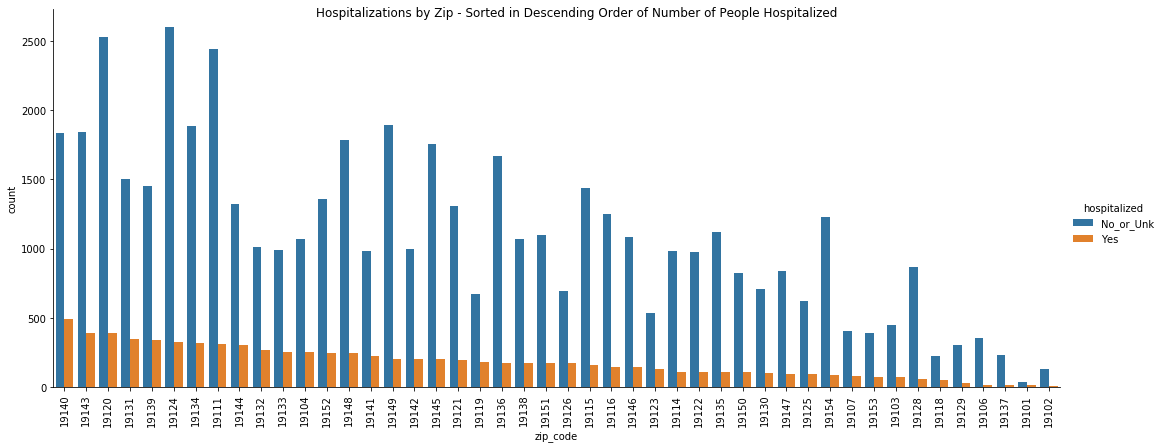

In [21]:
# Plot of hospitalizations by zip
hosp_zip_plot = sns.catplot(x = "zip_code", y = "count", hue = "hospitalized", data=hosp_zip, 
                            order=hosp_order['zip_code'], kind = "bar", height=6, aspect=2.5)
hosp_zip_plot.fig.suptitle('Hospitalizations by Zip - Sorted in Descending Order of Number of People Hospitalized')
hosp_zip_plot.set_xticklabels(rotation=90)
plt.show()

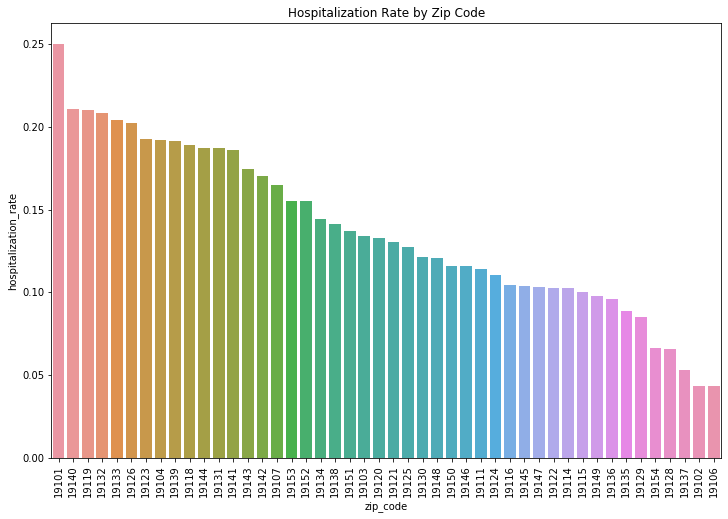

In [22]:
# Hospitalization rate by zip code
plt.subplots(figsize=(12,8))
hosp_rate_df_plot = sns.barplot(x='zip_code', y='hospitalization_rate', data=hosp_rate_df,
                               order=hosp_rate_df.sort_values('hospitalization_rate', ascending=False)['zip_code'])
hosp_rate_df_plot.set_xticklabels(hosp_rate_df['zip_code'],rotation=90)
plt.title('Hospitalization Rate by Zip Code')
plt.show()

Comparing the rate plot to the hospitalization plot above it, we can see that while `19101` has the 2nd lowest hospitalization **count**, the **rate** of hospitalizations is highest of all the zip codes. `19140` has the most cases and the 2nd highest rate.

In [23]:
# Merge DFs for hospitalization rate by zip median
hosp_rate_by_median = hosp_yes.merge(price_median_by_zip, how = 'inner', on = 'zip_code')

In [24]:
# Get rate of hospitalization in reference to median listing price by zip
hosp_rate_median_price_list = []

for i in range(0, len(hosp_rate_by_median)):
    rate = round(hosp_rate_by_median['count'][i] / hosp_rate_by_median['median_price'][i], 4)
    hosp_rate_median_price_list.append(rate)
    
hosp_rate_by_median['rate_by_median_list_price'] = hosp_rate_median_price_list
hosp_rate_by_median = hosp_rate_by_median.sort_values('rate_by_median_list_price', ascending=False).reset_index(drop=True)

In [25]:
hosp_rate_by_median.head()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,hospitalized,count,etl_timestamp,median_price,rate_by_median_list_price
0,66,None,None,19140,Yes,489,2020-11-20T18:20:02Z,80000.0,0.0061
1,2,None,None,19132,Yes,266,2020-11-20T18:20:02Z,50000.0,0.0053
2,31,None,None,19133,Yes,254,2020-11-20T18:20:02Z,52500.0,0.0048
3,42,None,None,19139,Yes,343,2020-11-20T18:20:02Z,127450.0,0.0027
4,59,None,None,19131,Yes,346,2020-11-20T18:20:02Z,135000.0,0.0026


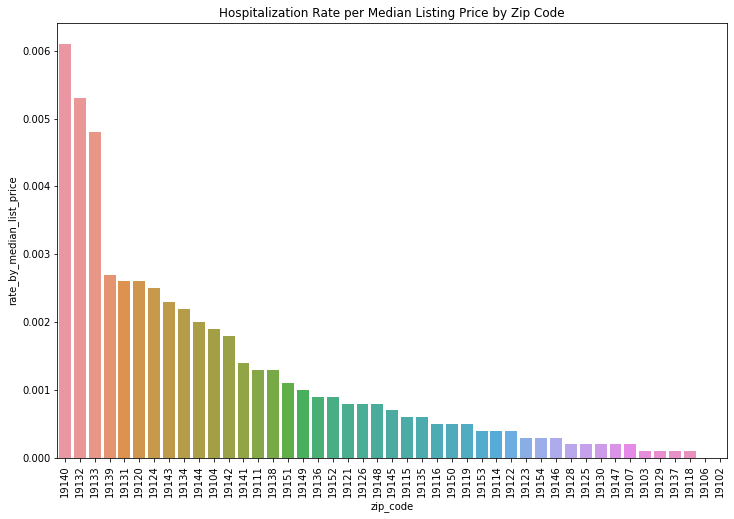

In [26]:
# Hospitalizations by zip divided by corresponding zip median listing price
plt.subplots(figsize=(12,8))
hosp_rate_median_list_plot = sns.barplot(x='zip_code', y='rate_by_median_list_price', data=hosp_rate_by_median,
                               order=hosp_rate_by_median.sort_values('rate_by_median_list_price', ascending=False)['zip_code'])
hosp_rate_median_list_plot.set_xticklabels(hosp_rate_by_median['zip_code'],rotation=90)
plt.title('Hospitalization Rate per Median Listing Price by Zip Code')
plt.show()

### The top 3 zips here really stand out: `19140, 19132, and 19133`. If we go back up and look at the 'Median Listing Price by Zip' plot, we can see that these 3 zip codes were the bottom 3 in median listing price. If we assume that median listing price reflects poverty level, it's very clear that lower income zip codes are being hit much harder by COVID-19 than higher income zip codes.

## Test outcome by zip

In [27]:
test_zip.head()

,cartodb_id,the_geom,the_geom_webmercator,covid_status,zip_code,count,etl_timestamp
0,1,None,None,NEG,19160,36,2020-11-20T18:20:02Z
1,2,None,None,NEG,19113,53,2020-11-20T18:20:02Z
2,3,None,None,POS,19154,1313,2020-11-20T18:20:02Z
3,4,None,None,POS,19132,1276,2020-11-20T18:20:02Z
4,5,None,None,NEG,19104,28856,2020-11-20T18:20:02Z


In [28]:
# convert 'zip_code' to int64 for merging
test_zip['zip_code'] = test_zip['zip_code'].astype(int)

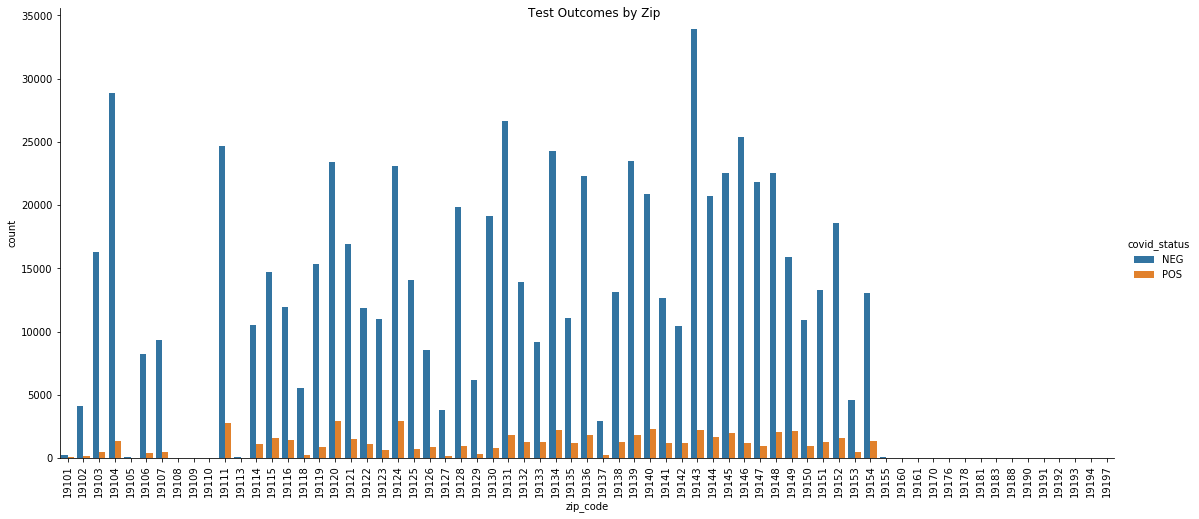

In [29]:
# Test outcomes by zip
test_zip_plot = sns.catplot(x = "zip_code", y = "count", hue = "covid_status", data=test_zip, kind = "bar", height=7, aspect=2.25)
test_zip_plot.fig.suptitle('Test Outcomes by Zip')
test_zip_plot.set_xticklabels(rotation=90)
plt.show()

Build a dataframe for positive cases by zip divided by corresponding median listing price.

In [30]:
new_df = test_zip.merge(price_median_by_zip, how = 'inner', on = 'zip_code')

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cartodb_id            92 non-null     int64  
 1   the_geom              0 non-null      object 
 2   the_geom_webmercator  0 non-null      object 
 3   covid_status          92 non-null     object 
 4   zip_code              92 non-null     int64  
 5   count                 92 non-null     int64  
 6   etl_timestamp         92 non-null     object 
 7   median_price          92 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.5+ KB


In [32]:
new_df.sort_values('median_price', ascending=False).head()

,cartodb_id,the_geom,the_geom_webmercator,covid_status,zip_code,count,etl_timestamp,median_price
10,9,None,None,NEG,19118,5525,2020-11-20T18:20:02Z,860000.0
11,83,None,None,POS,19118,275,2020-11-20T18:20:02Z,860000.0
86,97,None,None,NEG,19102,4093,2020-11-20T18:20:02Z,670000.0
87,107,None,None,POS,19102,138,2020-11-20T18:20:02Z,670000.0
14,11,None,None,POS,19103,515,2020-11-20T18:20:02Z,599900.0


In [33]:
new_df.sort_values('median_price', ascending=False).tail()

,cartodb_id,the_geom,the_geom_webmercator,covid_status,zip_code,count,etl_timestamp,median_price
59,103,None,None,POS,19140,2322,2020-11-20T18:20:02Z,80000.0
61,96,None,None,POS,19133,1246,2020-11-20T18:20:02Z,52500.0
60,56,None,None,NEG,19133,9169,2020-11-20T18:20:02Z,52500.0
3,104,None,None,NEG,19132,13886,2020-11-20T18:20:02Z,50000.0
2,4,None,None,POS,19132,1276,2020-11-20T18:20:02Z,50000.0


In [34]:
pos_df = new_df[new_df['covid_status'] == 'POS']
pos_df = pos_df.reset_index(drop=True)

In [35]:
## Postive case rate by zip code median listing price
case_rate_by_zip_median = []

for i in range(0, len(pos_df['count'])):
    rate = round(pos_df['count'][i] / pos_df['median_price'][i], 4)
    case_rate_by_zip_median.append(rate)

In [36]:
pos_df['case_rate_by_zip_median'] = case_rate_by_zip_median

The POS/NEG above plot is tough to make sense of. Let's make a plot with just positive case count by zip. Then, we'll make a plot of positive case rate as a function of the median.

In [37]:
# Sort values by count
pos_df = pos_df.sort_values('count', ascending=False).reset_index(drop=True)

In [38]:
pos_df[['zip_code', 'count']].head()

,zip_code,count
0,19124,2926
1,19120,2914
2,19111,2758
3,19140,2322
4,19143,2233


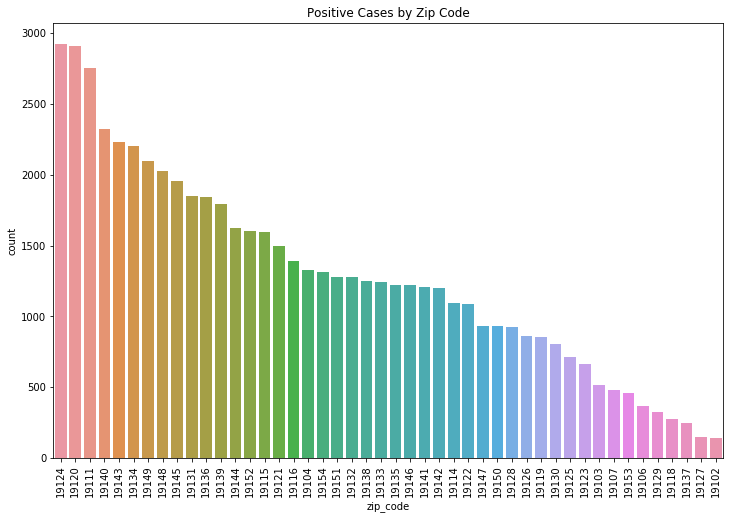

In [39]:
# Positive cases count by zip
plt.subplots(figsize=(12,8))
pos_case_by_zip_plot = sns.barplot(x='zip_code', y='count', data=pos_df,
                                  order=pos_df.sort_values('count', ascending=False)['zip_code'])
pos_case_by_zip_plot.set_xticklabels(pos_df['zip_code'],rotation=90)
plt.title('Positive Cases by Zip Code')
plt.show()

In [40]:
# Copy our DF and reorder the DF by 'case_rate_by_zip_median'
pos_med_rate = pos_df.sort_values('case_rate_by_zip_median', ascending=False).reset_index(drop=True).copy()

In [41]:
pos_med_rate[['zip_code', 'case_rate_by_zip_median']].head()

,zip_code,case_rate_by_zip_median
0,19140,0.0290
1,19132,0.0255
2,19133,0.0237
3,19124,0.0228
4,19120,0.0194


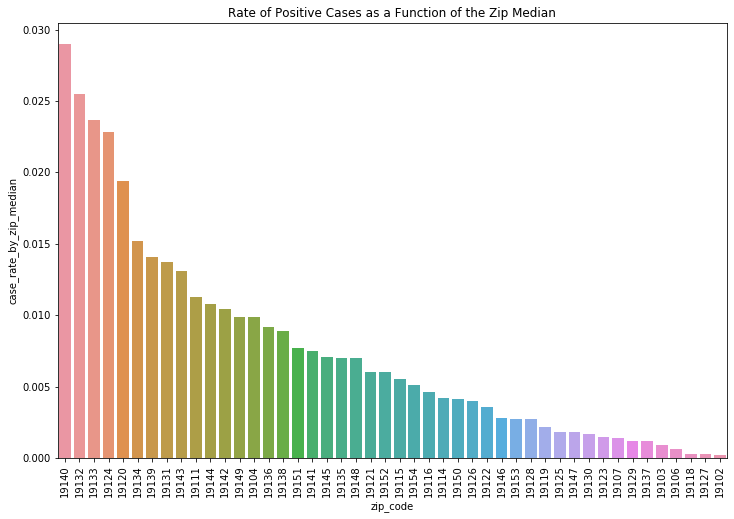

In [42]:
# Positive cases by zip divided by median price listing
plt.subplots(figsize=(12,8))
case_by_zip_median_plot = sns.barplot(x='zip_code', y='case_rate_by_zip_median', data=pos_med_rate,
                                     order=pos_med_rate.sort_values('case_rate_by_zip_median', ascending=False)['zip_code'])
case_by_zip_median_plot.set_xticklabels(pos_med_rate['zip_code'],rotation=90)
plt.title('Rate of Positive Cases as a Function of the Zip Median')
plt.show()

### Again, our top 3 here are 19140, 19132, and 19133. This may be kind of obvious in comparison to the hospitalizations rate plot - a zip with a high hospitalization rate per median listing price should have a high positive case rate by median listing price.

## Deaths by Zip

In [43]:
# Order the DF by count
death_zip = death_zip.sort_values('count', ascending=False).reset_index(drop=True)

In [44]:
death_zip.head()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,covid_outcome,count,etl_timestamp
0,4,None,None,19115,DIED,122,2020-11-20T18:20:02Z
1,25,None,None,19131,DIED,103,2020-11-20T18:20:02Z
2,34,None,None,19144,DIED,100,2020-11-20T18:20:02Z
3,40,None,None,19126,DIED,96,2020-11-20T18:20:02Z
4,37,None,None,19116,DIED,89,2020-11-20T18:20:02Z


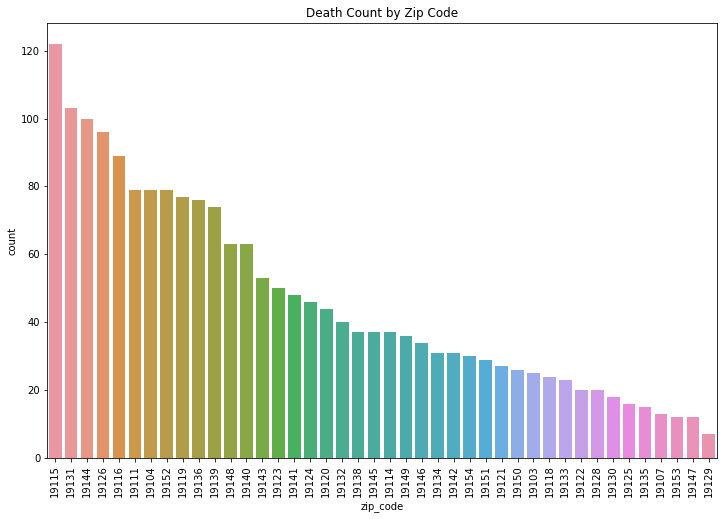

In [45]:
# Death count by zip
plt.figure(figsize=(12,8))
death_zip_plot = sns.barplot(x='zip_code', y='count', data=death_zip,
                             order=death_zip.sort_values('count', ascending=False)['zip_code'])
death_zip_plot.set_xticklabels([i for i in death_zip['zip_code']], rotation=90)
plt.title('Death Count by Zip Code')
plt.show()

Build dataframe for deaths by zip divided by median listing price for corresponding zip.

In [46]:
death_zip['zip_code'] = death_zip['zip_code'].astype(int)
death_merge = death_zip.merge(price_median_by_zip, how = 'inner', on = 'zip_code')

In [47]:
## Death rate by median listing price
death_rate_by_zip_median = []

for i in range(0, len(death_merge['count'])):
    rate = round(death_merge['count'][i] / death_merge['median_price'][i], 5) * 100
    death_rate_by_zip_median.append(rate)

death_merge['death_rate_by_zip_median'] = death_rate_by_zip_median
death_merge = death_merge.sort_values('death_rate_by_zip_median', ascending=False).reset_index(drop=True)

In [48]:
death_merge.head()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,covid_outcome,count,etl_timestamp,median_price,death_rate_by_zip_median
0,2,None,None,19132,DIED,40,2020-11-20T18:20:02Z,50000.0,0.080
1,38,None,None,19140,DIED,63,2020-11-20T18:20:02Z,80000.0,0.079
2,25,None,None,19131,DIED,103,2020-11-20T18:20:02Z,135000.0,0.076
3,34,None,None,19144,DIED,100,2020-11-20T18:20:02Z,150000.0,0.067
4,16,None,None,19104,DIED,79,2020-11-20T18:20:02Z,134000.0,0.059


In [49]:
death_merge.tail()

,cartodb_id,the_geom,the_geom_webmercator,zip_code,covid_outcome,count,etl_timestamp,median_price,death_rate_by_zip_median
37,1,None,None,19107,DIED,13,2020-11-20T18:20:02Z,344500.0,0.004
38,30,None,None,19103,DIED,25,2020-11-20T18:20:02Z,599900.0,0.004
39,10,None,None,19118,DIED,24,2020-11-20T18:20:02Z,860000.0,0.003
40,8,None,None,19147,DIED,12,2020-11-20T18:20:02Z,525000.0,0.002
41,11,None,None,19129,DIED,7,2020-11-20T18:20:02Z,284950.0,0.002


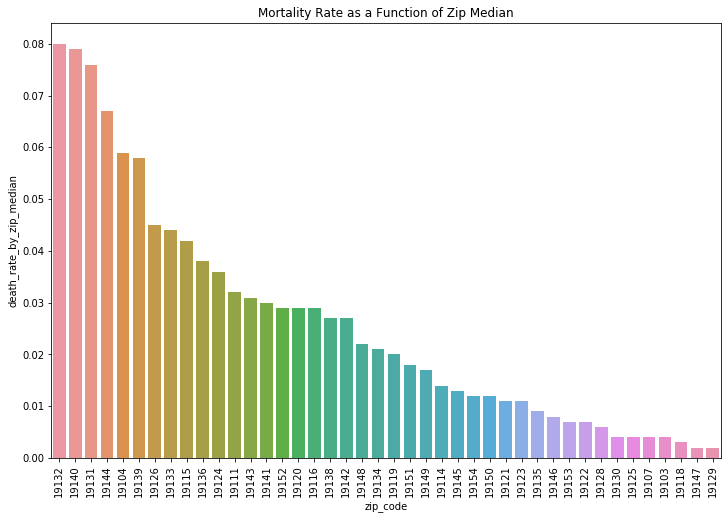

In [50]:
# Death count by zip divided by median listing price for corresponding zip
plt.subplots(figsize=(12,8))
death_merge_plot = sns.barplot(x='zip_code', y='death_rate_by_zip_median', data=death_merge,
                             order=death_merge.sort_values('death_rate_by_zip_median', ascending=False)['zip_code'])
death_merge_plot.set_xticklabels(death_merge['zip_code'],rotation=90)
plt.title('Mortality Rate as a Function of Zip Median')
plt.show()

### While zips 19140 and 19132 we're in the middle of the pack for death count, we see these zip codes have the highest rates when considering the amount of deaths in reference to median listing price. These zips were in the bottom 3 of median listing price. The highest median listing price zip code, 19118, was also in approximately the bottom quarter of zip codes for death count.